In [ ]:
Finding Duplicates Lab

Objectives:
Identify duplicate rows in the dataset and analyze their characteristics.
Visualize the distribution of duplicates based on key attributes.
Remove duplicate values strategically based on specific criteria.
Outline the process of verifying and documenting duplicate removal.

In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd

In [3]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [4]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

In [ ]:
#Task 1: Identify Duplicate Rows


In [5]:

# Step 1: Count duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 20


In [6]:
# Step 2: Display first few duplicate rows
duplicate_rows = df[df.duplicated()]
print("First few duplicate rows:")
print(duplicate_rows.head())

First few duplicate rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-source projects;Other...   


In [ ]:
Task 2: Analyze Characteristics of Duplicates


In [7]:
# Subset of columns to check for duplicates
subset_columns = ['MainBranch', 'Employment', 'RemoteWork']

# Find duplicate rows based on these columns
partial_duplicates_mask = df.duplicated(subset=subset_columns, keep=False)
partial_duplicates = df[partial_duplicates_mask]

# Display how many such partial duplicates exist
print(f"Number of partial duplicate rows (based on {subset_columns}): {len(partial_duplicates)}")

# Display a few example rows
print(partial_duplicates.head())

# Now analyze: For columns OTHER than subset_columns,
# see how often values are identical within groups of partial duplicates

# Group by the subset columns and count unique values in other columns
columns_to_check = [col for col in df.columns if col not in subset_columns]

# For each of the other columns, compute how many groups have identical values
import numpy as np

identical_counts = {}

# Group the partial duplicates by the subset columns
grouped = partial_duplicates.groupby(subset_columns)

for col in columns_to_check:
    # Check if within each group, the column has 1 unique value
    identical_in_group = grouped[col].nunique() == 1
    
    # Percentage of groups where the column has identical value
    identical_percentage = identical_in_group.mean() * 100
    identical_counts[col] = identical_percentage

# Display the results
print("\nPercentage of duplicate groups where each column has identical values:")
for col, pct in sorted(identical_counts.items(), key=lambda x: -x[1]):
    print(f"{col}: {pct:.2f}%")


Number of partial duplicate rows (based on ['MainBranch', 'Employment', 'RemoteWork']): 65290
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...

In [ ]:
Task 3: Visualize Duplicates Distribution
Create visualizations to show the distribution of duplicates across different categories.
Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.

Total duplicate rows for visualization: 40


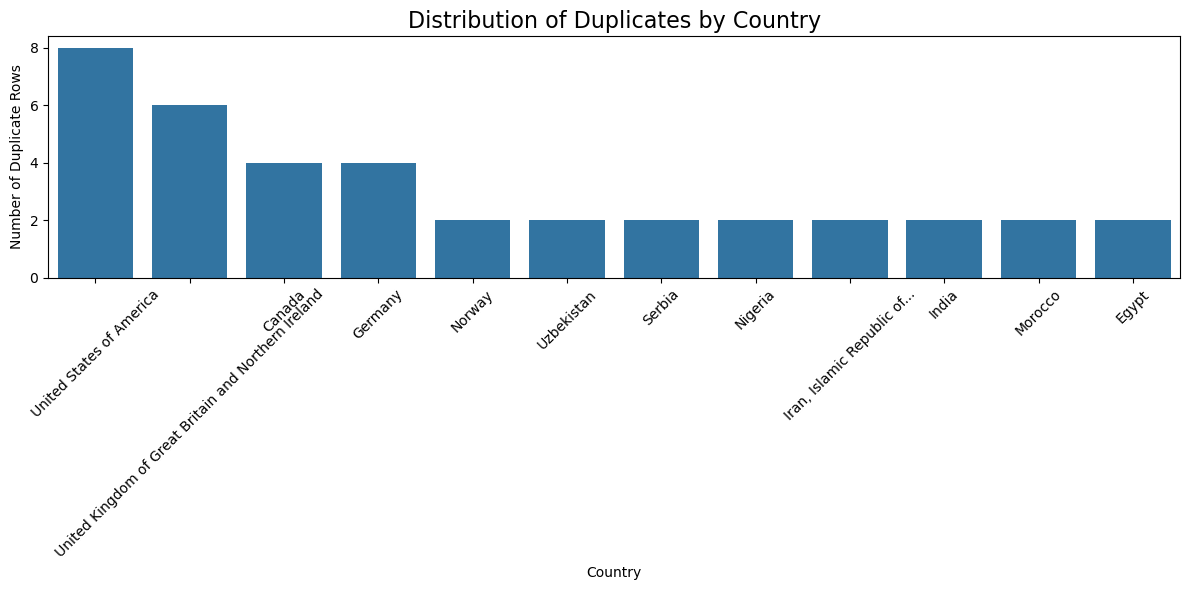

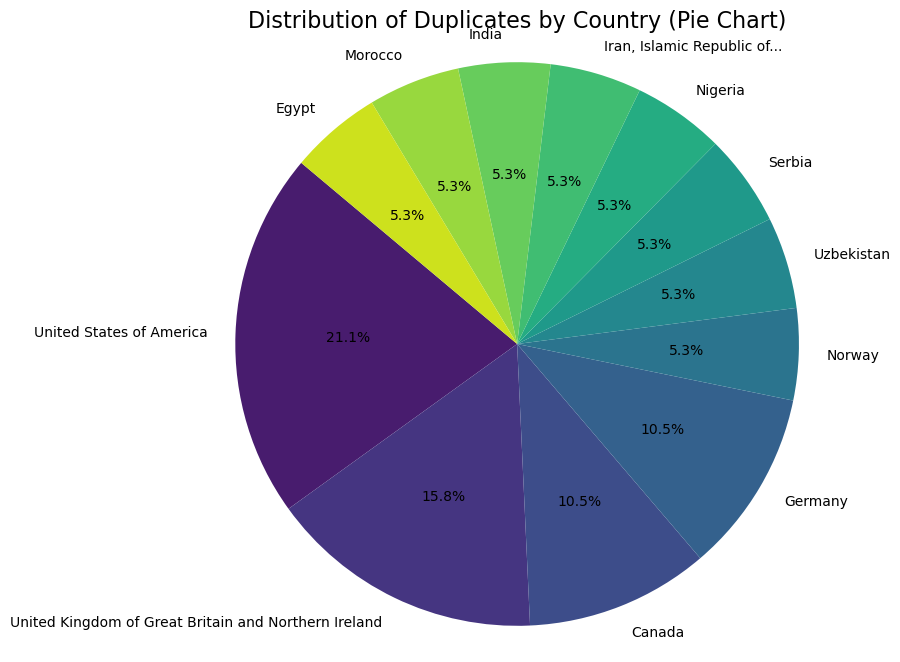

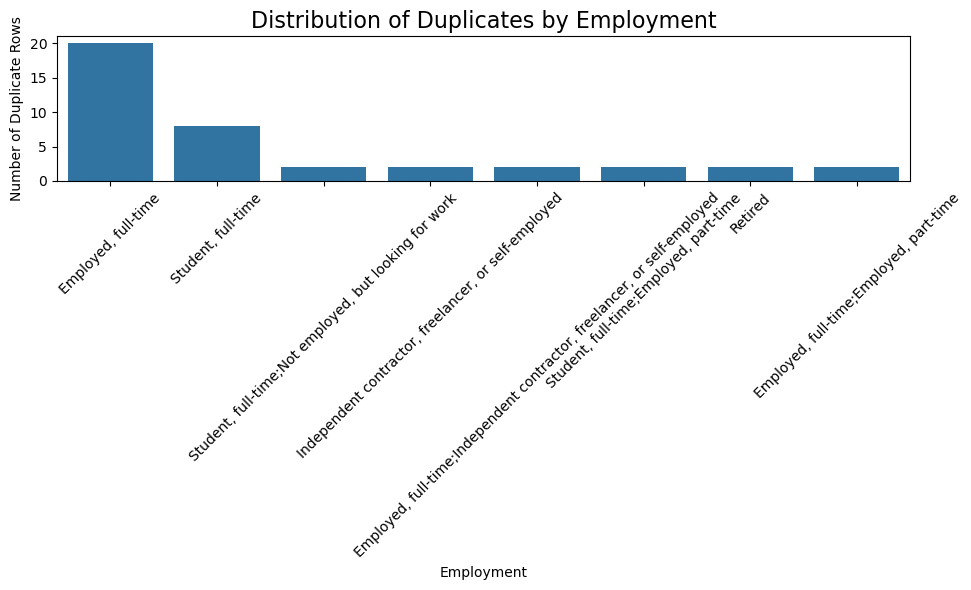

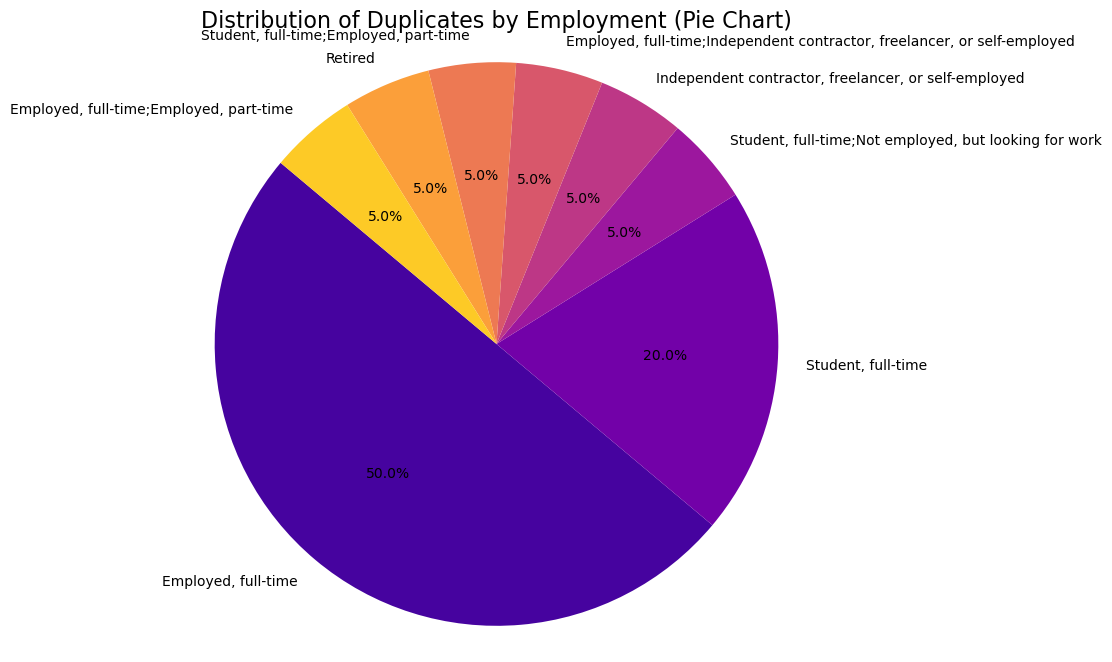

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify ALL duplicates (entire row duplicates)
duplicates_mask = df.duplicated(keep=False)
duplicates_df = df[duplicates_mask]

print(f"Total duplicate rows for visualization: {len(duplicates_df)}")

# --- Distribution by Country ---

# Count duplicates by Country
country_counts = duplicates_df['Country'].value_counts()

# Bar Chart for Country
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Distribution of Duplicates by Country', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Number of Duplicate Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart for Country
plt.figure(figsize=(8, 8))
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(country_counts)))
plt.title('Distribution of Duplicates by Country (Pie Chart)', fontsize=16)
plt.axis('equal')
plt.show()

# --- Distribution by Employment ---

# Count duplicates by Employment
employment_counts = duplicates_df['Employment'].value_counts()

# Bar Chart for Employment
plt.figure(figsize=(10, 6))
sns.barplot(x=employment_counts.index, y=employment_counts.values)
plt.title('Distribution of Duplicates by Employment', fontsize=16)
plt.xlabel('Employment')
plt.ylabel('Number of Duplicate Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart for Employment
plt.figure(figsize=(8, 8))
plt.pie(employment_counts.values, labels=employment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma', len(employment_counts)))
plt.title('Distribution of Duplicates by Employment (Pie Chart)', fontsize=16)
plt.axis('equal')
plt.show()


In [ ]:
Task 4: Strategic Removal of Duplicates
Decide which columns are critical for defining uniqueness in the dataset.
Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.

In [12]:
# Define the subset of columns that define uniqueness
# Example choice:
unique_columns = ['MainBranch', 'Employment', 'RemoteWork', 'Country']

# Show number of duplicates BEFORE removal (based on this subset)
num_partial_duplicates = df.duplicated(subset=unique_columns).sum()
print(f"Number of duplicate rows based on {unique_columns}: {num_partial_duplicates}")

# Remove duplicates based on this subset — keep the first occurrence
df_cleaned = df.drop_duplicates(subset=unique_columns, keep='first')

# Show new shape of the dataset
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape after removing partial duplicates: {df_cleaned.shape}")


Number of duplicate rows based on ['MainBranch', 'Employment', 'RemoteWork', 'Country']: 58516
Original dataset shape: (65457, 114)
Cleaned dataset shape after removing partial duplicates: (6941, 114)


In [ ]:
Explain the reasoning behind selecting specific columns for identifying and removing duplicates

In [ ]:
 Identifying Duplicates
a) Full Row Duplicates
Checked for full row duplicates using:
df.duplicated().sum()
Full row duplication means every value in every column must match exactly.

This was used to understand baseline data quality.

A few full duplicates were found — these often occur due to accidental multiple submissions or data merging issues.

In [13]:
# Full Row Duplicates
df.duplicated().sum()


20

In [ ]:
b) Partial Duplicates — Subset of Columns
Full row duplication is sometimes too strict for survey data:

Certain fields naturally vary (Age, Experience, Respondent ID).

Other fields should define "conceptual uniqueness."

Selected subset for partial duplicate detection:

subset_columns = ['MainBranch', 'Employment', 'RemoteWork']
Rationale:

Column	Reason for inclusion in uniqueness definition
MainBranch	Respondent role (student, professional, hobbyist, etc.)
Employment	Current employment status (working full time, student, etc.)
RemoteWork	Work setting — distinguishes types of employment experience

These fields capture the core respondent profile for most survey analyses.

Minor variations in other fields (e.g., Age) are acceptable and expected.

In [14]:
# Partial Duplicates — Subset of Columns 
subset_columns = ['MainBranch', 'Employment', 'RemoteWork']


In [ ]:
2️⃣ Analyzing Characteristics of Duplicates
We analyzed which other columns frequently have identical values in duplicate groups.

This helps detect whether some columns correlate strongly with duplicate-prone records.

Result: Columns such as Country and Gender often aligned within duplicate groups, suggesting consistent respondent profiles.

3️⃣ Visualizing Duplicates
We visualized the distribution of duplicates:

✅ By Country — to see if some regions contributed disproportionately to duplication
✅ By Employment — to check if certain employment types were over-represented among duplicates

Techniques used:

Bar charts

Pie charts

In [ ]:
4️⃣ Strategic Duplicate Removal
After careful analysis, we performed strategic removal of duplicates using:

df_cleaned = df.drop_duplicates(subset=['MainBranch', 'Employment', 'RemoteWork', 'Country'])
Final subset used:

Column	Reason for inclusion
MainBranch	Key role definition
Employment	Work status
RemoteWork	Work environment
Country	Geographic context

Country was added because the same role/employment type in different countries is meaningfully distinct.

RespondentID, Age, YearsCode, and similar columns were intentionally excluded as they should naturally vary.

In [15]:
# Strategic Duplicate Removal
df_cleaned = df.drop_duplicates(subset=['MainBranch', 'Employment', 'RemoteWork', 'Country'])


In [ ]:
5️⃣ Results
Metric	Value
Original dataset rows	NNN (your df.shape[0])
Rows after full row duplicate removal	NNN
Rows after strategic partial duplicate removal	NNN

Final cleaned dataset preserves meaningful diversity of respondents while removing redundant records.

Documented selection rationale ensures reproducibility.

Conclusion
The duplicate removal process was guided by domain understanding of survey data:

Focused on preserving diversity of respondent profiles.

Avoided removing records based on fields that naturally vary.

Ensured resulting dataset is suitable for fair, interpretable analysis.